[*********************100%***********************]  1 of 1 completed


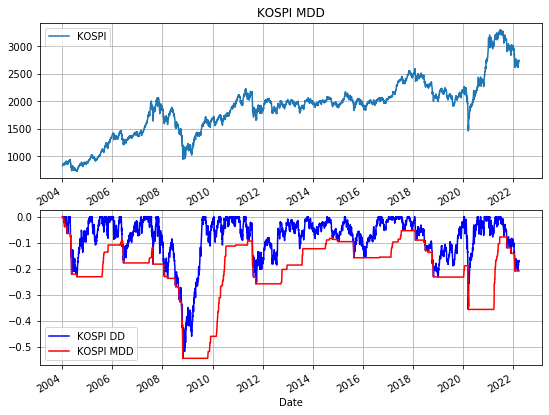

-0.5453665130144085


In [1]:
# KOSPId의 MDD(Maximum DrawDown) 구해보기 (최대 손실 낙폭)

# 시리즈.rolling(윈도우크기, min_periods).집계함수()
# rolling은 시리즈를 대항으로 윈도우 크기에 해당하는 개수만큼
# 데이터를 추출하여 집계함수 연산을 실시한다
# min_periods를 지정하면 데이터 수가 윈도우 크기에 못미치더라도
# min_periods에 지정한 개수만 만족하면 연산을 수행한다

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04') # ^KS11은 코스피지수의 심볼

window = 252 # 개장일을 어림잡아 계산한게 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max() # 종가기준 최고치를 구함
drawdown = kospi['Adj Close'] / peak - 1.0 # peak 대비 현재 KOSPI종가가 얼마나 하락했는지 구함
max_dd = drawdown.rolling(window, min_periods=1).min() # 1년 단위로 최저치 max_dd를 구함
# 마이너스 값이기 때문에 최저치가 곧 최대 손실 낙폭이 됨

plt.figure(figsize=(9, 7))
plt.subplot(211) # 2,1 행렬에서 1행에 그린다
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212) # 2,1 행렬에서 2행에 그린다
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

# 서브프라임 금융위기였던 2008년 10월 24일에 코스피지수가 10.57% 하락하면서
# MDD가 -54.5%를 기록했다. 정확한 MDD는 min()으로 보자
print( max_dd.min() )